# '123' Example

In [7]:
import sys; sys.path.insert(0,"../")
import numpy as np
import random
import matplotlib.pyplot as plt

import mview

A 10K points version of 123 can be found here:

In [8]:
X_true = np.genfromtxt('data/spicy_rice_10000_123.csv', delimiter=',')
Y1 = np.genfromtxt('data/spicy_rice_10000_1.csv', delimiter=',')
Y2 = np.genfromtxt('data/spicy_rice_10000_2.csv', delimiter=',')
Y3 = np.genfromtxt('data/spicy_rice_10000_3.csv', delimiter=',')

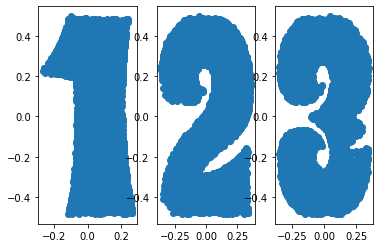

In [20]:
fig, ax = plt.subplots(1,3)
ax[0].plot(Y1[:,0],Y1[:,1],'o')
ax[1].plot(Y2[:,0],Y2[:,1],'o')
ax[2].plot(Y3[:,0],Y3[:,1],'o')

Lets run an experiment from this data, using only a portion of the points, and using the (fixed) true projections ('cylinder' for this example).

For fixed projections, mview.basic finds the global solution very easily (for any average_neighbors).

mpse.MPSE():
cylinder
  MPSE.initialize():
    X0 : random
    Q0 : given
  dissimilarity stats:
    number of views : 3
    number of points : 1024
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : fixed projections
    initial stress : 8.65e-01
gd.single(): 
  computation parameters:
    stochastic : True
    constraint : False
    update rule : mm
    min_grad : 1.00e-05
    max_iter : 300
    max_step : 1.00e+04
  progress:
     167/300 : cost = 8.52e-05, grad = 1.01e-05, lr = 1.01e+00, step = 1.02e-05
  results:
    conclusion : minimum gradient size reached
    total iterations : 168
    final cost : 8.28e-05
    final gradient size : 9.65e-06
    final learning rate : nan
    final step size : nan
    time : 4.39e+01 [sec]
  Final stress : 5.77e-05


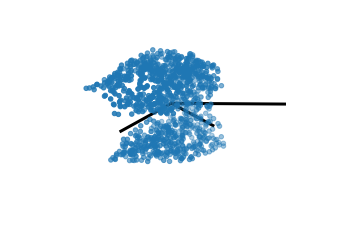

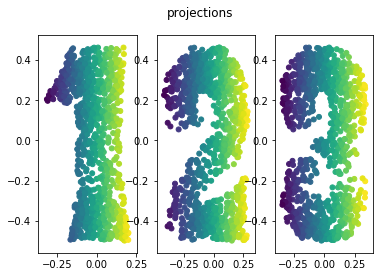

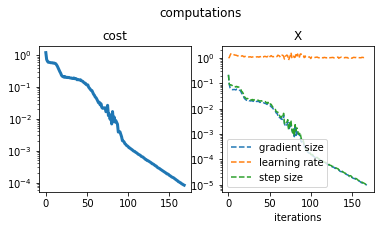

In [37]:
N = 1024
inds = random.sample(range(10000),N)

mv = mview.basic([Y1[inds],Y2[inds],Y3[inds]],Q='cylinder',
                 average_neighbors = 4,
                 max_iter=300, min_grad=1e-5,lr=1,min_cost=1e-4,
                 verbose=2)
mv.figureX()
mv.figureY()
mv.figureH()

And on the 3 perspectives:

With varying projections, the algorithm (without smart initialization) fails to find the optimal solution, even for large average_neighbors.

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 128
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 8.84e-01
gd.multiple(): 
  computation parameters:
    stochastic : True
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [0.001, 0.001]
    min_cost : 1.00e-04
    min_grad : 1.00e-05
    max_iter : 300
    max_step : 1.00e+04
  progress:
300 : step = 1.11e-02, grad = 5.75e-01, cost = 6.35e-02, lr = 9.46e-02
  results:
    conclusion : maximum number of iterations reached
    total iterations : 299
    final cost : 6.34e-02
    time : 2.99e+02 [sec]
  Final stress : 4.29e-02


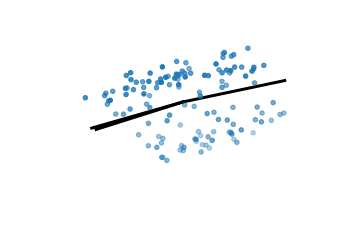

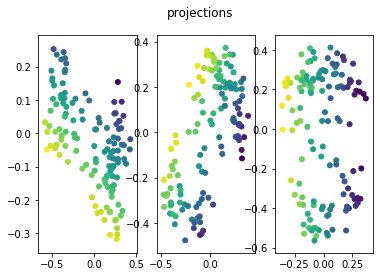

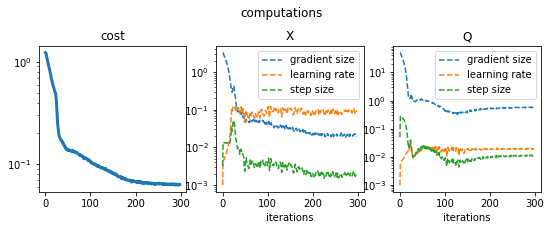

In [44]:
N = 128
inds = random.sample(range(10000),N)

mv = mview.basic([Y1[inds],Y2[inds],Y3[inds]],
                 average_neighbors = 32,
                 max_iter=300, min_grad=1e-5,lr=.001,min_cost=1e-4,
                 verbose=2)
mv.figureX()
mv.figureY()
mv.figureH()

If we add 'smart_initialize', then the algorithm does better (find the global minimum more often). The average_neighbors needs to be higher (I get correct results with 16).

Note: The plots for the history look a little weird. This is because I am combining results from each computation (MDS embedding of combined distances, MPSE search of projections that best fit MDS initialization, then regular coordinate adaptive GD to find solution). I'll update soon to divide the costs from different parts of the algorithm more efficiently (so the two spikes in the middle of the graph don't mean that something is wrong, but rather that we are changing objective function).

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 128
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.smart_initialize():
mds.MDS():
  dissimilarity stats:
    number of points : 128
    number of edges : 8128
    dissimilarity rms : 1.47e+00
    normalization factor : 1.19e+04
  embedding stats:
    dimension : 3
  MDS.initialize( - ):
    method : initialization given
    initial stress : 4.03e-01
  MDS.gd():
    initial stress : 4.03e-01
gd.single(): 
  computation parameters:
    stochastic : True
    constraint : False
    update rule : mm
    min_step : 1.00e-04
    max_iter : 30
    max_step : 1.00e+04
  progress:
      29/30 : cost = 4.31e-02, grad = 8.16e-03, lr = 1.57e+00, step = 1.28e-02
  results:
    conclusion : maximum number of iterations reached
    total iterations : 29
    final cost : 4.31e-02
    final gradient size : 8.16e-03
    final learning 

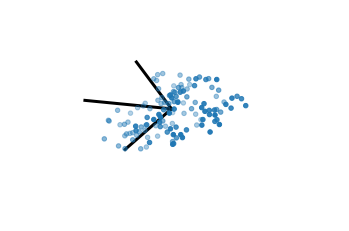

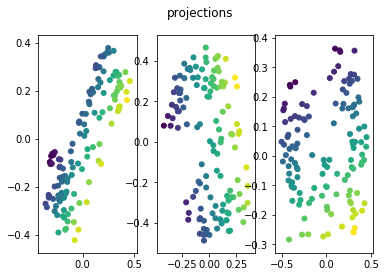

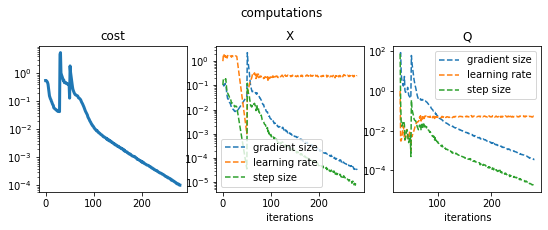

In [41]:
N = 128
inds = random.sample(range(10000),N)

mv = mview.basic([Y1[inds],Y2[inds],Y3[inds]],
                 smart_initialize=True,
                 average_neighbors = 16,
                 max_iter=300, min_grad=1e-5,lr=.001,min_cost=1e-4,
                 verbose=2)
mv.figureX()
mv.figureY()
mv.figureH()

There is some issues with 'smart_initialize' that I must still resolve, such as dealing correctly with different embedding/projection dimensions and number of perspectives.

Since getting that right seems that will indeed be important, I'll be working on that and update soon.